In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [74]:
!gdown https://drive.google.com/uc?id=1VKuCi2vNFZLhmyy2CdU0Lp8-Ab3re81N 
!gdown https://drive.google.com/uc?id=1JaF3TKLcveF2-88mzqF9EgP8928JhpCB
!gdown https://drive.google.com/uc?id=13ORjoqdKbALvDyVjPIq23HWleQhccafJ
!gdown https://drive.google.com/uc?id=1oijYQho6s63CjHppuJT7ERaRb81Javkt

Downloading...
From: https://drive.google.com/uc?id=1VKuCi2vNFZLhmyy2CdU0Lp8-Ab3re81N
To: /content/interactions_test.csv
100% 523k/523k [00:00<00:00, 151MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JaF3TKLcveF2-88mzqF9EgP8928JhpCB
To: /content/interactions_train.csv.zip
100% 9.29M/9.29M [00:00<00:00, 199MB/s]
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=13ORjoqdKbALvDyVjPIq23HWleQhccafJ 

Downloading...
From: https://drive.google.com/uc?id=1oijYQho6s63CjHppuJT7ERaRb81Javkt
To: /content/RAW_recipes.csv.zip
100% 87.3M/87.3M [00:00<00:00, 294MB/s]


In [75]:
! echo y | unzip RAW_interactions.csv.zip 
! echo y | unzip RAW_recipes.csv.zip
! echo y | unzip interactions_train.csv.zip

Archive:  RAW_interactions.csv.zip
replace RAW_interactions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: RAW_interactions.csv    
Archive:  RAW_recipes.csv.zip
replace RAW_recipes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: RAW_recipes.csv         
Archive:  interactions_train.csv.zip
replace interactions_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: interactions_train.csv  


In [76]:
comments = pd.read_csv('RAW_interactions.csv')

In [77]:
comments.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [78]:
comments.shape

(1132367, 5)

# Pré-traitement des données

On teste dans un premier temps sur les 100 meilleures recettes et les 1000 utilisateurs qui ont le plus mis de notes.

In [79]:
# filter recipes
comments['count'] = comments.groupby('recipe_id').transform('count')['user_id']
recipeId = comments.drop_duplicates('recipe_id').sort_values(
    'count', ascending=False).iloc[:100]['recipe_id']
comments = comments[comments['recipe_id'].isin(recipeId)].reset_index(drop=True)

#filter users
comments['count'] = comments.groupby('user_id').transform('count')['recipe_id']
userId = comments.drop_duplicates('user_id').sort_values(
    'count', ascending=False).iloc[:1001]['user_id']
comments = comments[comments['user_id'].isin(userId)].reset_index(drop=True)

comments.shape

(11706, 6)

In [80]:
comments.head()

,user_id,recipe_id,date,rating,review,count
0,20371,26110,2002-10-20,5,These biscuits were exceptional: tender and mo...,11
1,28649,26110,2002-10-27,5,This were a bit hit with my family. I used a ...,12
2,8688,26110,2003-03-06,5,Excellent recipe for delicious and fabulous re...,38
3,28346,26110,2003-03-10,5,Oh wow! I was part of the Biscuit Making Clas...,7
4,60694,26110,2003-05-08,5,"A substantial biscuit; flaky, filling and rich...",7


Séparation du jeu d'entrainement et du jeu de test :  

In [92]:
#Creating a train and a test set
testset = comments.sample(frac=0.1, replace=False)
trainset = comments[~comments.index.isin(testset.index)]
print(testset.shape, trainset.shape)
assert set(testset.user_id.unique()).issubset(trainset.user_id.unique())
assert set(testset.recipe_id.unique()).issubset(trainset.recipe_id.unique())

(1171, 6) (10535, 6)


In [82]:
testset.head()

,user_id,recipe_id,date,rating,review,count
9558,1196631,27144,2010-04-19,5,a great and easy cake fix! perfect for when y...,11
8486,651379,89204,2008-08-27,4,Thought this was very tastey. My DH however th...,16
6313,20371,27208,2002-07-14,5,NOW I know what the fuss has been all about .....,11
9293,359220,26217,2009-03-22,4,Wow! This recipe makes a lot of sauce! I mad...,23
5817,269331,31128,2006-12-31,5,Wow this was GREAT! I used granny smith apple...,14


In [83]:
testset[testset['user_id'] == 121185]

,user_id,recipe_id,date,rating,review,count
9868,121185,47195,2008-04-21,2,These didn't turn out so great....tasted burnt...,26
2054,121185,68955,2004-09-22,5,Really VERY good! My entire family of 4 loved...,26


Proportion de 5/5 dans le jeu d'entrainement : 





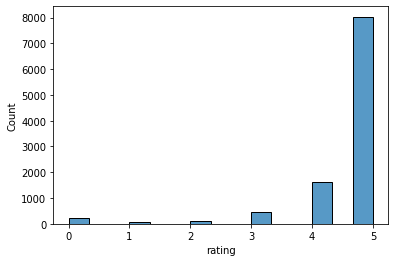

In [91]:
sns.histplot(data=trainset, x="rating")

On convertit le dataset pandas en dataset Pytorch

In [85]:
import torch
from torch.utils.data import Dataset, DataLoader

user_list = trainset.user_id.unique()
item_list = trainset.recipe_id.unique()
user2id = {w: i for i, w in enumerate(user_list)}
item2id = {w: i for i, w in enumerate(item_list)}

class Ratings_Datset(Dataset):
    def __init__(self, df):
        self.df = df.reset_index()

    def __len__(self):
        return len(self.df)
  
    def __getitem__(self, idx):
        user = user2id[self.df['user_id'][idx]]
        user = torch.tensor(user, dtype=torch.long)
        item = item2id[self.df['recipe_id'][idx]]
        item = torch.tensor(item, dtype=torch.long)
        rating = torch.tensor(self.df['rating'][idx], dtype=torch.float)
        return user, item, rating


trainloader = DataLoader(Ratings_Datset(trainset), batch_size=256, shuffle=True ,num_workers=2)
testloader = DataLoader(Ratings_Datset(testset), batch_size=64, num_workers=2)

# Définition du modèle 

On va approximer le produit vectoriel item-user par un réseau de neurones : ceci correspond au Neural Collaborative Filtering.

In [86]:
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
from statistics import mean
import math



def train(model, optimizer, trainloader, epochs=30):
    criterion = nn.MSELoss(reduction='mean')
    t = tqdm(range(epochs))
    for epoch in t:
        corrects = 0
        total = 0
        train_loss = []
        for users, items, r in trainloader:
            users = users.cuda()
            items = items.cuda()
            r = r.cuda() / 5
            y_hat = model(users, items)
            loss = criterion(y_hat, r.unsqueeze(1).float())
            train_loss.append(loss.item())
            total += r.size(0)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            t.set_description(f"loss: {mean(train_loss)}")


def test(model, testloader, m_eval=False):
    running_mae = 0
    with torch.no_grad():
        corrects = 0
        total = 0
        for users, items, r in testloader:
            users = users.cuda()
            items = items.cuda()
            y = r.cuda() / 5
            y_hat = model(users, items).flatten()
            error = torch.abs(y_hat - y).sum().data
            
            running_mae += error
            total += y.size(0)
    
    mae = running_mae/total
    return mae * 5

In [87]:
import torch.nn as nn
import torch


class NCF(nn.Module):
    def __init__(self, n_users, n_items, n_factors=8):
        super().__init__()
        self.user_embeddings = nn.Embedding(n_users, n_factors)
        self.item_embeddings = nn.Embedding(n_items, n_factors)
        self.predictor = nn.Sequential(
            nn.Linear(in_features=n_factors * 2, out_features=64),
            nn.Linear(in_features=64, out_features=32),
            nn.Linear(in_features=32, out_features=1),
            nn.Sigmoid(),
        )

    def forward(self, user, item):

        u = self.user_embeddings(user)
        i = self.item_embeddings(item)

        # Concat the two embedding layers
        z = torch.cat([u, i], dim=-1)
        return self.predictor(z)


# Entrainement du modèle 

In [88]:
n_user = trainset.user_id.nunique()
n_items = trainset.recipe_id.nunique()
model = NCF(n_user, n_items).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train(model, optimizer, trainloader, epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

# Evaluation du jeu de test 

In [89]:
test(model, testloader)

tensor(0.6155, device='cuda:0')

In [90]:
users, recipes, r = next(iter(testloader))
users = users.cuda()
recipes = recipes.cuda()
r = r.cuda()

y = model(users, recipes)*5
print("ratings", r[:40].data)
print("predictions:", y.flatten()[:40].data)

ratings tensor([5., 4., 5., 4., 5., 5., 4., 5., 5., 5., 5., 4., 5., 5., 4., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 1., 5., 4., 5., 3.,
        5., 5., 5., 5.], device='cuda:0')
predictions: tensor([4.6112, 4.5906, 4.6346, 4.5971, 4.7563, 4.7114, 4.5636, 4.6686, 4.5402,
        4.7034, 4.5606, 4.4081, 4.6723, 4.6168, 4.6723, 4.6735, 4.6204, 4.4331,
        4.3566, 4.7335, 4.6167, 4.6101, 4.7317, 4.6533, 4.4756, 4.5744, 4.7019,
        4.5280, 4.6464, 4.4979, 4.6957, 4.5021, 4.5871, 4.5731, 4.5046, 4.5972,
        4.6457, 4.6527, 4.6304, 4.5801], device='cuda:0')
